<a href="https://colab.research.google.com/github/calebmarentes10/Mineria-de-datos-/blob/main/Tecnicas%20de%20mineria_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Equipo2**

###**120 YEARS OF OLYMPIC HISTORY**

https://www.kaggle.com/mysarahmadbhat/120-years-of-olympic-history

***Introducción general:***

120 years of olympic history  es una base de datos que como su nombre lo dice, consta datos históricos sobre los Juegos Olímpicos modernos, desde Atenas 1896 hasta Río 2016. Cada fila corresponde a un atleta individual que compite en un evento individual, incluido el nombre del atleta, sexo, edad, altura, peso, país y medalla, y el nombre del evento. , deporte, juegos, año y ciudad.

Con estos datos pretendemos dar a conocer cuáles han sido los deportes con más medallas, y cual es el competidor promedio ideal para ganar oro en cada deporte.

**Descripción de los datos:**

Los datos provienen de los Juegos Olímpicos donde se han acomodado en 15 columnas de la siguiente manera:

- *ID Unique number for each athlete:* En esta columna podemos ver el ID del atleta
- *Name Athlete's name:* En esta columna podemos ver el nombre del atleta
-*Sex Male (M) or Female (F):* : En esta columna podemos ver el género del atleta
-*Age Integer:* En esta columna podemos ver la edad del atleta
- *Height In centimeters:* En esta columna podemos ver la estatura del atleta en centímetros
- *Weight In kilograms*: En esta columna podemos ver el peso del atleta en kilogramos
- *Team:* En esta columna podemos ver el equipo que representa el atleta
- *NOC National Olympic Committee 3-letter code:* En esta columna podemos ver el codigo de el país que representa el atleta
- *Games Year and season:* En esta columna podemos ver el año y la temporada de la competencia
- *Year Integer:* En esta columna podemos en que año se realizaron los juegos olímpicos
Season: En esta columna podemos ver la temporado de los juegos olímpicos ya sea verano o invierno
- *City:* En esta columna podemos ver el en que ciudad se llevó a cabo la contienda
- *Sport:* En esta columna podemos ver el nombre del deporte
- *Event:* En esta columna podemos ver el nombre del evento en el participó el atleta
- *Medal Gold, Silver, Bronze, or NA:* En esta columna podemos ver si el atleta logró obtener medalla o no

**Justificación de los datos:**

Decidimos hacer esta base de datos debido a que nos intriga saber que es lo que hace a un competir llegar a ser un competidor olímpico,  o cuales son los rasgos que identifican a un deportista olímpico

Los beneficios para trabajar con esta base de datos es que podemos ver con facilidad que es lo que caracteriza a un deportista a olímpico que cuales son los promedios de un medallista olímpico

**Objetivo final:**

Analizar a fondo cuales son las características específicas que han ayudado a los competidores a lograr colgarse de una presea y ver cuales son los detalles que les favorece a los deportistas de cada país en  las distintas temporadas de los eventos

**Preguntas de interés:**

¿Cuáles son las características promedio de un medallista de oro? ya sea en: edad, peso, estatura y país

¿En qué magnitud se pueden ver alterados los medalleros según la temporada de los juegos olímpicos? ya sea de verano o de invierno

In [ ]:
import pandas as pd
import numpy as np
import json

jjoo=pd.read_csv("/content/Atletes_event.csv",encoding='utf8', index_col=[0])
JJOO=jjoo.rename(columns={'Name':'Nombre','Sex':'Sexo','Age':'Edad','Height':'Estatura','Weight':'Peso','Team':'Equipo','Games':'Juegos','Year':'Año','Season':'Temporada','City':'Ciudad','Sport':'Deporte','Event':'Evento','Medal':'Medalla'})



**Valores diferentes a cero**

Dado a que buscamos unos resultados mas precisos procederemos a hacer una limpieza identificando los valores con cero para ser posteriormente separados o eliminados 

*Analizando todas las variables, concluimos que era necesario el precio del libro debido a que los datos se recabaron por parte de una plataforma de compra online, asi mismo, consideramos que los clientes ademas de las reseñas, se guían por el precio por lo que tener un valor de 0 en precio no tiene razon de ser. Dado esto, eliminaremos las filas que contengan 0.

In [ ]:
print("Ceros en Nombre   = ", np.count_nonzero(JJOO.Nombre== 0))
print("Ceros en Año      = ",np.count_nonzero(JJOO.Edad== 0))
print("Ceros en Sexo     = ",np.count_nonzero(JJOO.Sexo== 0))
print("Ceros en Estatura = ", np.count_nonzero(JJOO.Estatura == 0))
print("Ceros en Peso     = ",np.count_nonzero(JJOO.Peso== 0))
print("Ceros en Equipo   = ",np.count_nonzero(JJOO.Equipo== 0))
print("Ceros en NOC      = ",np.count_nonzero(JJOO.NOC== 0))
print("Ceros en Juegos   = ", np.count_nonzero(JJOO.Juegos== 0))
print("Ceros en Año      = ",np.count_nonzero(JJOO.Año== 0))
print("Ceros en Temporada= ", np.count_nonzero(JJOO.Temporada == 0))
print("Ceros en Ciudad   = ",np.count_nonzero(JJOO.Ciudad== 0))
print("Ceros en Deporte  = ",np.count_nonzero(JJOO.Deporte== 0))
print("Ceros en Evento   = ",np.count_nonzero(JJOO.Evento== 0))
print("Ceros en Medalla  = ",np.count_nonzero(JJOO.Medalla== 0))

Ceros en Nombre   =  0
Ceros en Año      =  9474
Ceros en Sexo     =  0
Ceros en Estatura =  60171
Ceros en Peso     =  62875
Ceros en Equipo   =  0
Ceros en NOC      =  0
Ceros en Juegos   =  0
Ceros en Año      =  0
Ceros en Temporada=  0
Ceros en Ciudad   =  0
Ceros en Deporte  =  0
Ceros en Evento   =  0
Ceros en Medalla  =  0


Como podemos observar, contamos con 9,474 datos de personas que no nos brindan su edad, asi como 60,171 datos en estatura y 62,875 datos en peso donde tampoco contamos con información

Considerando que si eliminamos a aquellas personas que no brindan su información completa, nos quedaríamos con muy pocos datos ademas de correr el riesgo de que eliminemos a paises participantes en caso de que solo hayan tenido un solo participante en un solo deporte hemos decidido crear dos bases de datos de una sola y prevenir la perdida de datos masiva.

En este caso contaremos con una base de datos de pesos y estaturas eliminando aquellos datos que no brinden la información requerida debido a que nos interesa saber cual es la complexion promedio o necesaria de un altleta de alto rendimento. Por otro lado, tendremos otra base sin las columnas de peso y estatura con el fin de analizar los paises participantes, deportes y demas 

Asi mismo, eliminaremos la columna "NOC" y la columna "Games" debido a que la primera es la abreviacion del país y la segunda es un concatenado entre año y temporada por lo que tendriamos datos innecesariamente repetidos.


In [ ]:
SinCero=JJOO[JJOO.Edad > 0]
SinCero
SinCero.to_csv('SinCero.csv')
SinCero=pd.read_csv('SinCero.csv', index_col=[0]) #Guardamos el primer filtrado 

SinCero1=SinCero[SinCero.Estatura > 0]
SinCero1
SinCero1.to_csv('SinCero1.csv')
SinCero1=pd.read_csv('SinCero1.csv', index_col=[0]) #Guardamos el segundo filtrado 

SinCero2=SinCero1[SinCero1.Peso > 0]
SinCol=SinCero2.drop(['NOC','Juegos'],axis=1)
SinCol
SinCol.to_csv('SinCero2.csv')
Base1=pd.read_csv('SinCero2.csv', index_col=[0]) #Guardamos el tercer filtrado 

SinCero3=JJOO[JJOO.Peso > 0]
SinCero3
SinCero3.to_csv('SinCero3.csv')
SinCero3=pd.read_csv('SinCero3.csv', index_col=[0])

SinCero4=JJOO[JJOO.Estatura > 0]
SinCero4
SinCero4.to_csv('SinCero4.csv')
SinCero4=pd.read_csv('SinCero4.csv', index_col=[0])


Después de haber filtrado los datos para quedar **sin ceros en Age, Height y Weight** nos quedamos con la siguiente base de datos 

In [ ]:
Base1
Base1.isnull().sum()

Nombre       0
Sexo         0
Edad         0
Estatura     0
Peso         0
Equipo       0
Año          0
Temporada    0
Ciudad       0
Deporte      0
Evento       0
Medalla      0
dtype: int64

Debido a que la siguiente es la segunda base, tenemos que volver a eliminar las columnas no deseadas de la base original (NOC, Juegos). Asi mismo, esta es la que no contendrá los datos de los pesos y las estaturas 

In [ ]:
EstPeso=JJOO.drop(['Peso','Estatura','NOC','Juegos'],axis=1)
EstPeso

,Nombre,Sexo,Edad,Equipo,Año,Temporada,Ciudad,Deporte,Evento,Medalla
ID,,,,,,,,,,
1,A Dijiang,M,24,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
2,A Lamusi,M,23,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
3,Gunnar Nielsen Aaby,M,24,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
4,Edgar Lindenau Aabye,M,34,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29,Poland-1,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
135570,Piotr ya,M,27,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
135570,Piotr ya,M,27,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0


Procederemos a guardar nuestra base de datos donde **no contamos con pesos ni estaturas**


In [ ]:
EstPeso.to_csv('JJOO(2).csv')
Base2=pd.read_csv('JJOO(2).csv', index_col=[0])
Base2

,Nombre,Sexo,Edad,Equipo,Año,Temporada,Ciudad,Deporte,Evento,Medalla
ID,,,,,,,,,,
1,A Dijiang,M,24,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
2,A Lamusi,M,23,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
3,Gunnar Nielsen Aaby,M,24,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
4,Edgar Lindenau Aabye,M,34,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29,Poland-1,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
135570,Piotr ya,M,27,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
135570,Piotr ya,M,27,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0


#**Estadística básica de los datos**

En esta parte del proyecto podremos observar la estadística básica de nuestra base de datos

Como nuestra pregunta de interés es saber las características promedio de un medallista de oro observaremos las estadísticas de la edad, el peso, la estatura y país

Iniciaremos filtrando los medallistas que ganaron oro através de los años por lo que utilizaremos nuestra Base2 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
oro=JJOO[JJOO['Medalla']=='Gold']

Aquí podemos apreciar la estadística descriptiva de la **edad** de los medallistas de oro olímpicos

- Conteo de filas
- Media
- Desviación estándar
- Mínimo 
- Primer cuartil 
- Segundo cuartil 
- Tercer cuartil
- Máximo


In [ ]:
pd.DataFrame(SinCero['Edad'].describe())

,Edad
count,261642.000000
mean,25.556898
std,6.393561
min,10.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,97.000000


Esto nos dice que la edad promedio de los medallistas de oro es de alrededor de 26 años es decir que los atletas ganadores son atletas jóvenes y es la edad donde dan su mejor rendimient

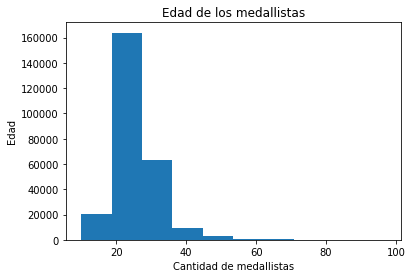

In [ ]:
plt.hist(SinCero['Edad'])
plt.title('Edad de los medallistas')
plt.xlabel('Cantidad de medallistas')
plt.ylabel('Edad')
plt.show()

Aquí podemos apreciar la estadística descriptiva de ***peso*** de los medallistas de oro olímpicos

- Conteo de filas
- Media
- Desviación estándar
- Mínimo 
- Primer cuartil 
- Segundo cuartil 
- Tercer cuartil
- Máximo

In [ ]:
pd.DataFrame(SinCero3['Peso'].describe())

,Peso
count,208241.000000
mean,70.702393
std,14.348020
min,25.000000
25%,60.000000
50%,70.000000
75%,79.000000
max,214.000000


Aunque esta estadística pueda ser algo subjetiva debido a que algunos deportes se necesita mas peso que en otros, sin embargo nos da una idea de como es el peso de un atleta olímpico ganador de una medalla de oro

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


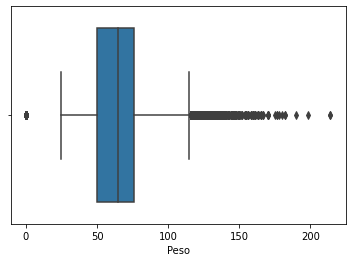

In [ ]:
sns.boxplot(SinCero['Peso'])


##Conclusion
En muchos deportes ya se tiene una categoria especifica de pesos pero lo que podemos ver aqui, nos muestra cual es el peso ideal para un deportista olimpico que es de 70.700 kilogramos

Aquí podemos apreciar la estadística descriptiva de la ***estatura*** de los medallistas de oro olímpicos

- Conteo de filas
- Media
- Desviación estándar
- Mínimo 
- Primer cuartil 
- Segundo cuartil 
- Tercer cuartil
- Máximo

In [ ]:
pd.DataFrame(SinCero4['Estatura'].describe())

,Estatura
count,210945.000000
mean,175.338970
std,10.518462
min,127.000000
25%,168.000000
50%,175.000000
75%,183.000000
max,226.000000


Aqui podemos ver como se distribuyen la alturas en cm de los atletas ganadores y nos describe que en promedio el atleta ganador es un atleta alto

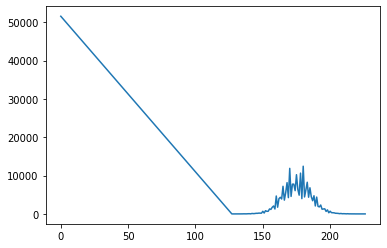

In [ ]:
SinCero['Estatura'].value_counts().sort_index().plot.line()

##Coclusion
A pesar de que estudios muestran que la estatura promedio del ser humano en el mundo es de 1,65 metros aproximadamente (sin diferenciar el sexo masculino del femenino). La grafica nos muestra que el promedio de los ganadores es una persona cerca de 10cm mas alta que el promedio del ser humano 1,75 metros aproximadamente (sin diferenciar el sexo masculino del femenino). 

Aqui podemos observar los 10 paises con mas medallas de oro

In [ ]:
medalxpais=oro.groupby(['Equipo']).count().sort_values(by=['Deporte'],ascending=False).head(10).iloc[:,1]
medalxpais=pd.DataFrame(medalxpais)
medalxpais

,Sexo
Equipo,
United States,2474
Soviet Union,1058
Germany,679
Italy,535
Great Britain,519
France,455
Sweden,451
Hungary,432
Canada,422


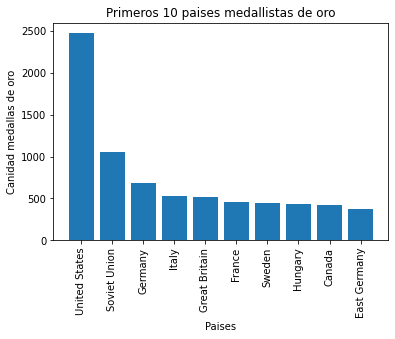

In [ ]:
plt.bar(medalxpais.index,medalxpais.iloc[:,0])
plt.xticks(rotation=90)
plt.title('Primeros 10 paises medallistas de oro')
plt.xlabel('Paises')
plt.ylabel('Canidad medallas de oro')
plt.show()

##Conclusión
El ser de algun pais en especifico tambien ayuda mucho en tu rendimiento de los juegos olimpicos, ya sea por el apoyo de tu pais tanto como en recursos o como en equipamento.
En este caso podemos ver como Estados Unidos lidera por mucho sobre los demas paises.

In [ ]:
medalxsex=pd.DataFrame(SinCero.groupby(by=['Sexo']).count()['Medalla'])
medalxsex

,Medalla
Sexo,
F,74098
M,187544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


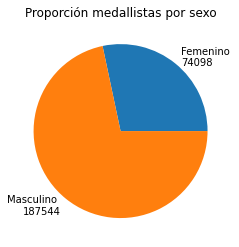

In [ ]:
plt.pie(medalxsex,labels=['Femenino \n'+str(medalxsex.iloc[0,0]),'Masculino \n'+str(medalxsex.iloc[1,0])])
plt.title('Proporción medallistas por sexo')
plt.show()

##Conclusión
Los Juegos de Ámsterdam de 1928 fueron los primeros que contaron con la participación oficial de mujeres, por lo tanto las mujeress se perdieron de 9 temporadas completas de competencias y eso hace una gran diferencia en el total de medallas

In [ ]:
SinCero.corr()

,Edad,Estatura,Peso,Año
Edad,1.000000,-0.132993,-0.071838,-0.115137
Estatura,-0.132993,1.000000,0.892639,0.620581
Peso,-0.071838,0.892639,1.000000,0.590639
Año,-0.115137,0.620581,0.590639,1.000000


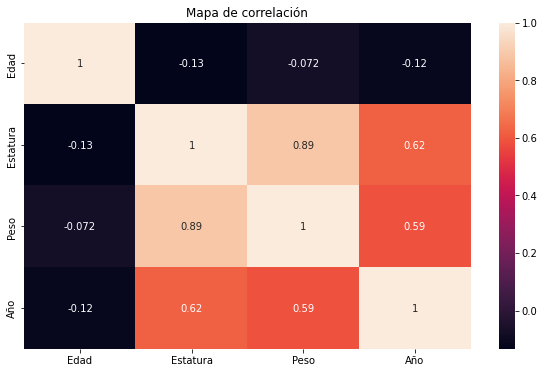

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(SinCero.corr(),annot=True)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fb9b4d190>,
      dtype=object)

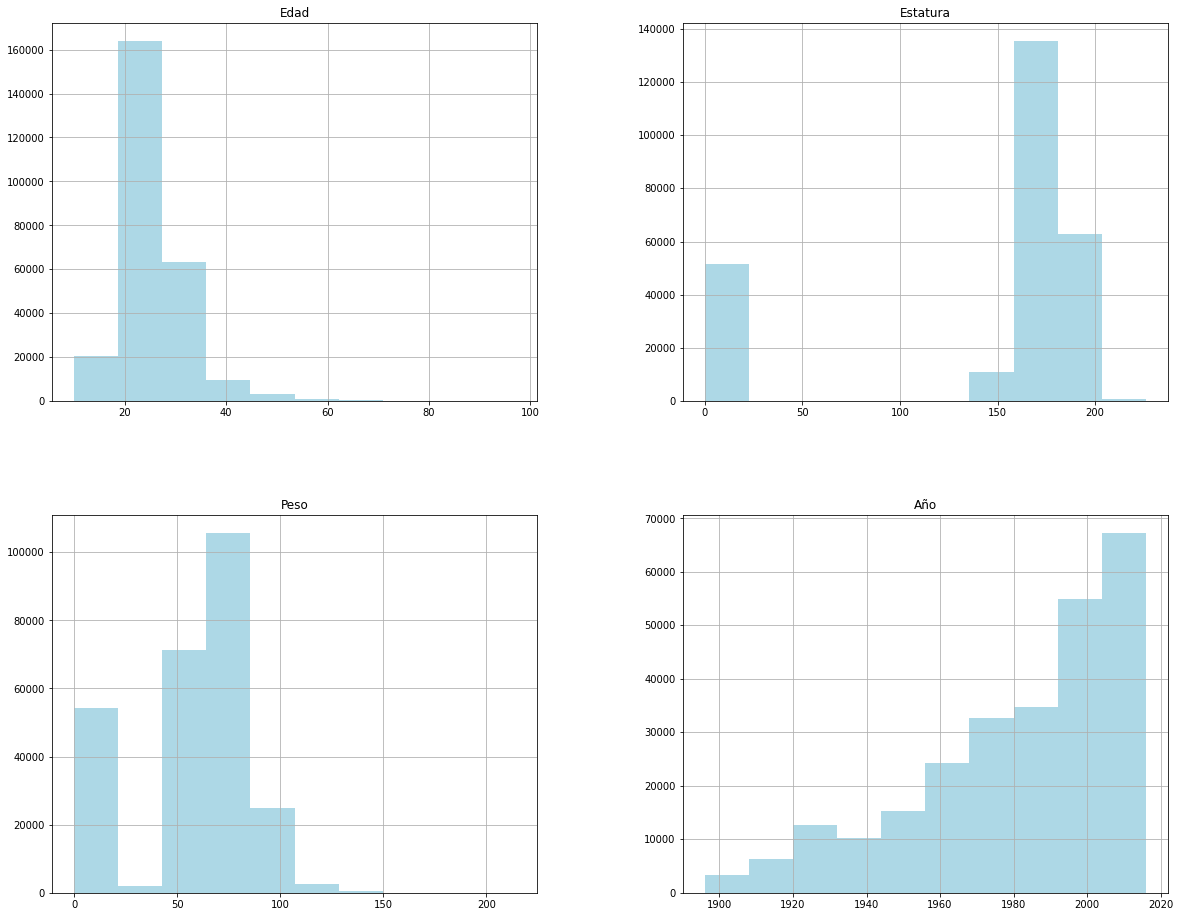

In [ ]:
SinCero.hist(figsize=(20, 16),color='lightblue')

##Conclusiones Generales
Gracias a estas ultimas graficas de todos los años y participantes que se dio por entendido que la mayoria de las personas pesan alrededor de 70 kg, que la estatura promedio de ellos es de 1.75 mts y que en su mayoria tienen alrededor de 25 años
Por lo que podemos concluir que el molde mas adaptable de una persona para los juegos olimpicos es un joven masculino de 25 años que mida 1.75 mts y su peso sea aproximadamente 70 kg

#Técnica de minería
La tecnica que usaremos para saber si el atleta ganara una medalla dependiendo de sus caracteristicas es la regresión logistica, este tipo de regresión utilizado para predecir el resultado de una variable categórica en este caso la variable medalla

[Notebook de kagle](https://www.kaggle.com/alperenclk/for-beginner-logistic-regression)


Primero elegiremos las variables de interes

In [ ]:
JJOO=JJOO[['Sexo','Edad','Estatura','Peso','Medalla']]

Después, cambiamos las variables a categoricas donde en sexo=0 se refiere a Masculino y sexo=1 hace referencia a Femenino, de igual manera en la variable de medalla el 1 hace referencia a que dicho atleta gano una medalla en dicho evento y el 0 nos indica que no logro conseguir una medalla en dicho evento 

In [ ]:
JJOO['Medalla']=JJOO['Medalla'].replace(['Gold','Bronze','Silver'],1)
JJOO['Medalla']=JJOO['Medalla'].replace('0',0)
JJOO['Sexo']=JJOO['Sexo'].replace(['M','F'],[0,1])
JJOO

,Sexo,Edad,Estatura,Peso,Medalla
ID,,,,,
1,0,24,180,80.0,0
2,0,23,170,60.0,0
3,0,24,0,0.0,0
4,0,34,0,0.0,1
5,1,21,185,82.0,0
...,...,...,...,...,...
135569,0,29,179,89.0,0
135570,0,27,176,59.0,0
135570,0,27,176,59.0,0


In [ ]:
JJOO

,Sexo,Edad,Estatura,Peso,Medalla
ID,,,,,
1,0,24,180,80.0,0
2,0,23,170,60.0,0
3,0,24,0,0.0,0
4,0,34,0,0.0,1
5,1,21,185,82.0,0
...,...,...,...,...,...
135569,0,29,179,89.0,0
135570,0,27,176,59.0,0
135570,0,27,176,59.0,0


Se importan las librerias para aplicar nuestro modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


una vez importadas las librerias procedemos a separar nuestros datos en variables predictorias y predicciones
asi mismo creamos el set de datos de entrenamiento y de prueba con 80% para entrenamiento y 20% para prueba 

In [ ]:
X=JJOO[['Sexo',	'Edad','Estatura','Peso']]
Y=JJOO['Medalla']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=1) 

Las siguientes lineas de codigo entrenamos nuestro modelo con nuestros datos de entrenamiento

In [ ]:
modelo=LogisticRegression()
modelo.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Y con nuestro set de prueba sealizamos predicciones

In [ ]:
predict=modelo.predict(X_test)
predict=pd.DataFrame(predict)
predict


,0
0,0
1,0
2,0
3,0
4,0
...,...
54219,0
54220,0
54221,0
54222,0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

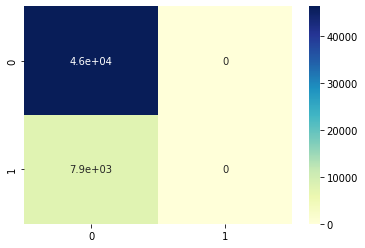

In [ ]:
matriz=confusion_matrix(y_test,predict)
sns.heatmap(matriz,annot=True,cmap="YlGnBu")